In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-56.94571633594152 147.86161076551258
25.19744963290053 78.73032264710497
-82.65166298264096 93.4220577550139
81.96655383742865 -26.15861494161902
-6.250271444342204 84.29911841218205
82.48892074578367 135.87000848442892
25.25792987182625 -158.71540167589163
81.88772349790716 -66.19639231056344
65.62049488766698 138.1528623134654
32.61454683690924 -76.35963048143859
51.96906418684233 85.02363051325892
-58.57063699974448 -126.58760479052138
61.25021149423094 -47.5957372497914
-64.46239624533035 -175.92788825633633
40.45007021363395 158.49447772537587
73.42877086054585 -100.03282347452223
3.692534676238054 110.63697344394853
-50.75704793916634 -1.0177201453684859
-8.867218496692232 -19.559139889819136
-7.640876241402509 64.20290211385097
-4.044635769660687 -54.50645502226223
-76.27522978530226 -118.99131498932002
-71.6707576457928 -11.10994349131903
24.96003142595795 -79.80150507329543
-8.264255279452556 -137.4697707200507
-53.95704253001158 -23.438751667559984
-65.7384884985565 165.4718

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

# Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
# Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
 # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
 # Add 1 to the record count.
    record_count += 1
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")                                         

Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | khailar
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | narsaq
Processing Record 9 of Set 1 | khandyga
Processing Record 10 of Set 1 | wilmington
Processing Record 11 of Set 1 | belokurikha
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | sibu
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | itaituba
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | key lar

Processing Record 39 of Set 4 | luderitz
Processing Record 40 of Set 4 | madinat sittah uktubar
Processing Record 41 of Set 4 | mayumba
Processing Record 42 of Set 4 | nuuk
Processing Record 43 of Set 4 | touros
Processing Record 44 of Set 4 | korla
Processing Record 45 of Set 4 | hovd
Processing Record 46 of Set 4 | chingirlau
Processing Record 47 of Set 4 | turan
Processing Record 48 of Set 4 | katima mulilo
Processing Record 49 of Set 4 | provideniya
Processing Record 50 of Set 4 | barrow
Processing Record 1 of Set 5 | san rafael
Processing Record 2 of Set 5 | calamar
Processing Record 3 of Set 5 | geraldton
Processing Record 4 of Set 5 | salamiyah
Processing Record 5 of Set 5 | itarema
Processing Record 6 of Set 5 | mason city
Processing Record 7 of Set 5 | kaniama
Processing Record 8 of Set 5 | zaysan
Processing Record 9 of Set 5 | safaga
Processing Record 10 of Set 5 | gijon
Processing Record 11 of Set 5 | mandalgovi
Processing Record 12 of Set 5 | aksu
Processing Record 13 of Se

Processing Record 32 of Set 8 | mizdah
Processing Record 33 of Set 8 | north platte
Processing Record 34 of Set 8 | talnakh
Processing Record 35 of Set 8 | rancho veloz
Processing Record 36 of Set 8 | ayagoz
Processing Record 37 of Set 8 | sur
Processing Record 38 of Set 8 | porbandar
Processing Record 39 of Set 8 | dalvik
Processing Record 40 of Set 8 | kaitangata
Processing Record 41 of Set 8 | yaan
Processing Record 42 of Set 8 | barawe
City not found. Skipping...
Processing Record 43 of Set 8 | rungata
City not found. Skipping...
Processing Record 44 of Set 8 | axim
Processing Record 45 of Set 8 | pozo colorado
Processing Record 46 of Set 8 | palauig
Processing Record 47 of Set 8 | kemin
Processing Record 48 of Set 8 | la rioja
Processing Record 49 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 50 of Set 8 | brae
Processing Record 1 of Set 9 | najran
Processing Record 2 of Set 9 | xudat
Processing Record 3 of Set 9 | mayo
Processing Record 4 of Set 9 | qaanaa

Processing Record 21 of Set 12 | dhidhdhoo
Processing Record 22 of Set 12 | amazar
Processing Record 23 of Set 12 | maragogi
Processing Record 24 of Set 12 | turgenevo
Processing Record 25 of Set 12 | dien bien
City not found. Skipping...
Processing Record 26 of Set 12 | morrope
Processing Record 27 of Set 12 | sydney
Processing Record 28 of Set 12 | kuloy
Processing Record 29 of Set 12 | sao miguel do oeste
City not found. Skipping...
Processing Record 30 of Set 12 | jacareacanga
Processing Record 31 of Set 12 | saint-pierre
Processing Record 32 of Set 12 | kununurra
Processing Record 33 of Set 12 | general roca
Processing Record 34 of Set 12 | mount pleasant
Processing Record 35 of Set 12 | college
Processing Record 36 of Set 12 | nelson bay
Processing Record 37 of Set 12 | hay river
Processing Record 38 of Set 12 | muswellbrook
Processing Record 39 of Set 12 | riyadh
Processing Record 40 of Set 12 | hastings
Processing Record 41 of Set 12 | glendive
Processing Record 42 of Set 12 | 

In [12]:
len(city_data)

585

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,48.06,87,20,8.05,AU,2022-05-29 23:55:55
1,Khailar,25.3500,78.5333,93.36,29,1,16.64,IN,2022-05-29 23:56:38
2,Albany,42.6001,-73.9662,74.05,59,22,2.62,US,2022-05-29 23:56:38
3,Hithadhoo,-0.6000,73.0833,83.30,69,99,10.11,MV,2022-05-29 23:56:39
4,Kapaa,22.0752,-159.3190,76.12,94,96,1.01,US,2022-05-29 23:56:39
5,Narsaq,60.9167,-46.0500,37.85,89,33,6.15,GL,2022-05-29 23:56:39
6,Khandyga,62.6667,135.6000,47.80,94,100,5.12,RU,2022-05-29 23:56:40
7,Wilmington,34.2257,-77.9447,80.51,72,31,5.12,US,2022-05-29 23:52:29
8,Belokurikha,51.9959,84.9896,57.76,82,2,7.90,RU,2022-05-29 23:56:40
9,Rikitea,-23.1203,-134.9692,76.69,69,8,12.95,PF,2022-05-29 23:56:40


In [14]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-05-29 23:55:55,-42.8794,147.3294,48.06,87,20,8.05
1,Khailar,IN,2022-05-29 23:56:38,25.3500,78.5333,93.36,29,1,16.64
2,Albany,US,2022-05-29 23:56:38,42.6001,-73.9662,74.05,59,22,2.62
3,Hithadhoo,MV,2022-05-29 23:56:39,-0.6000,73.0833,83.30,69,99,10.11
4,Kapaa,US,2022-05-29 23:56:39,22.0752,-159.3190,76.12,94,96,1.01
5,Narsaq,GL,2022-05-29 23:56:39,60.9167,-46.0500,37.85,89,33,6.15
6,Khandyga,RU,2022-05-29 23:56:40,62.6667,135.6000,47.80,94,100,5.12
7,Wilmington,US,2022-05-29 23:52:29,34.2257,-77.9447,80.51,72,31,5.12
8,Belokurikha,RU,2022-05-29 23:56:40,51.9959,84.9896,57.76,82,2,7.90
9,Rikitea,PF,2022-05-29 23:56:40,-23.1203,-134.9692,76.69,69,8,12.95


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

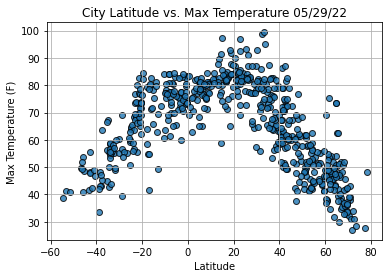

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

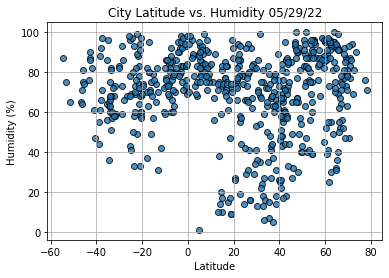

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

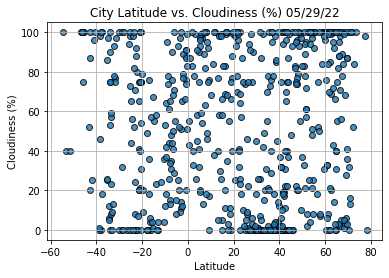

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

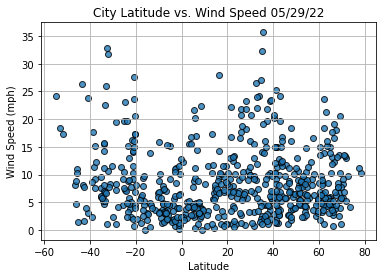

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                     Thompson
Country                        CA
Date          2022-05-29 23:56:42
Lat                       55.7435
Lng                      -97.8558
Max Temp                    53.76
Humidity                       94
Cloudiness                    100
Wind Speed                   5.75
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
580     True
581    False
582    False
583     True
584     True
Name: Lat, Length: 585, dtype: bool

In [25]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
580     True
581    False
582    False
583     True
584     True
Name: Lat, Length: 585, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Khailar,IN,2022-05-29 23:56:38,25.3500,78.5333,93.36,29,1,16.64
2,Albany,US,2022-05-29 23:56:38,42.6001,-73.9662,74.05,59,22,2.62
4,Kapaa,US,2022-05-29 23:56:39,22.0752,-159.3190,76.12,94,96,1.01
5,Narsaq,GL,2022-05-29 23:56:39,60.9167,-46.0500,37.85,89,33,6.15
6,Khandyga,RU,2022-05-29 23:56:40,62.6667,135.6000,47.80,94,100,5.12


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

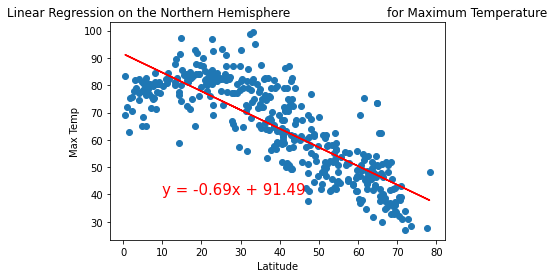

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

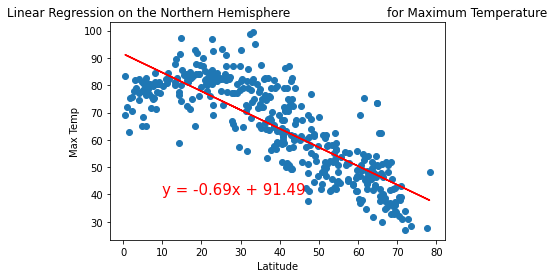

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

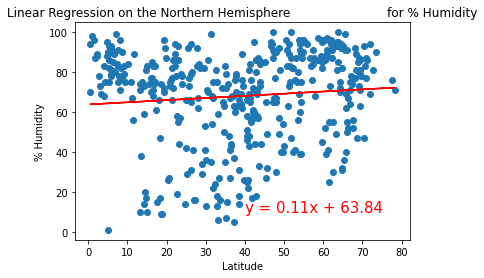

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

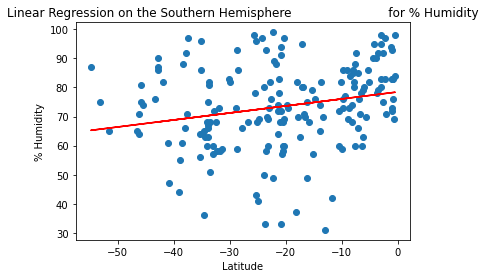

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

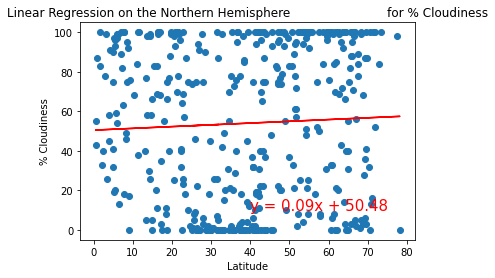

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

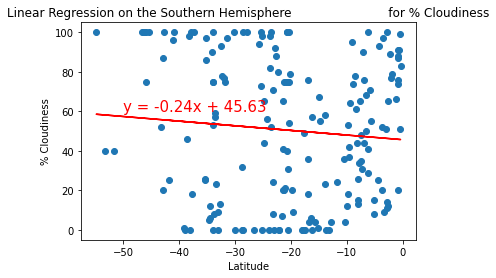

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

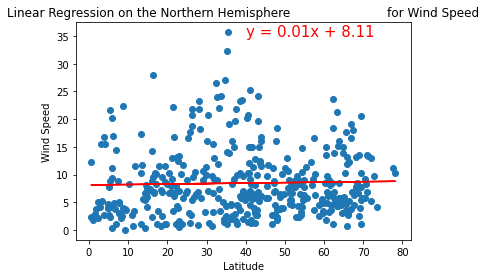

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

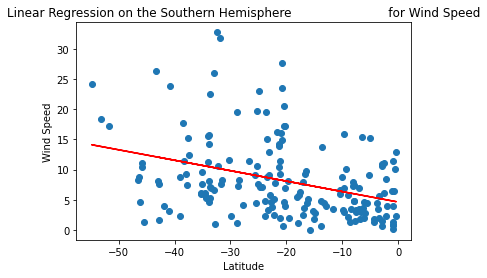

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))